# Convolutional Neural Networks 🥅

---
## Architechure of a Neural network 🚧
1. **Layer 1** : <mark style="background: #D2B3FFA6;">*conv2D*.</mark> : (For convolutional 2 Dimensional Data like Images , with height and width)
2. **Layer 2** : <mark style="background: #FFB86CA6;">Convolutional Layer</mark> () : Extrach and learn most important features from the target images 
3. **Layer 3** : <mark style="background: #FFF3A3A6;">Hidden Activation (ReLu)</mark> : Adds non linearity to learned features (non straight lines )
4. **Layer 4** : <mark style="background: #BBFABBA6;">Pooling Layer </mark>: Reduce the dimensionality of learned images (*Reduces the calculation the CNN has to make )

		Pooling layer: learns from already learned features , like for a example in a car if the learning feature are , like straight line is a hodd , circular lines are wheels , 
		
5. **Layer 5** : <mark style="background: #21D99A;">Fully Connected Layer (Output Layer)</mark> : Further refines the learned features from the convution layers 
6. **Layer 6** : <mark style="background: #ABF7F7A6;">Output activation </mark>( Adds on non linearities to the output layer )


# Construction 🚧 100

#### Convolution :

A convolution is a filter that is used to multiply a pixel with its neighbours  to get new values for the pixel


![[Pasted image 20250123233855.png | 400]]

Original Matrix and the Filter matrix in the <mark style="background: #ADCCFFA6;">blue</mark> : multiplication of these will give new vlaue for every pixel , and we will have a filtered image 
![[Pasted image 20250123234020.png | 500]]
Another picture multiplied with a convolution filer producing a new image


```python
tf.keras.layers.Conv2D(64, (3, 3), activation='relu',

input_shape=(28, 28, 1)),

```

In this case we want ot learn 64 convolutions , (3, 3 ) indicates the soze of the filter 

#### Pooling :

Pooling is the process of eliminating pixels in your image while maintaining the semantics of the content within the image
![[Pasted image 20250123234217.png | 400]]
Demonstration of pooling

- Box on the left : pixels in a monochrome image
- Group them into 2x2 arrays
- In this case 16 pixels are grouped into 4 2x2 arrays 
- These 4 groups are called **<mark style="background: #FFB8EBA6;">Pools</mark>

In [1]:
# Get the data : the data is from Food 101 dataset , which is (101 different classes of food  : but there is a modification , here in this dataset , we are working with only 2 classes , PIZZA and STEAK)
# Inspecting the data ===> the data is in the form of images , so we need to load the images and preprocess them
# Visualizing samples of the data 

In [2]:
import os 
# Walk through the pizze_steak directory and list the number of files 
for dirpath, dirnames , filenames in os.walk("/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak") :
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in the '{dirpath}'")

In [3]:
# Visualizing the data
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pathlib
import numpy as np
import tensorflow as tf

# Set up the directory
data_dir = pathlib.Path("/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Create a list of class_names from the subdirectories
print(class_names)



ModuleNotFoundError: No module named 'matplotlib'

In [6]:
# Visualizing the sample data

def view_random_image(traget_dir , target_class) :
    # Set up the target directory , (we will view images from here)
    target_folder = traget_dir + target_class
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder) , 1)
    #Read an image and plot it using the matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"Image shape : {img.shape}")
    return img

Image shape : (512, 512, 3)


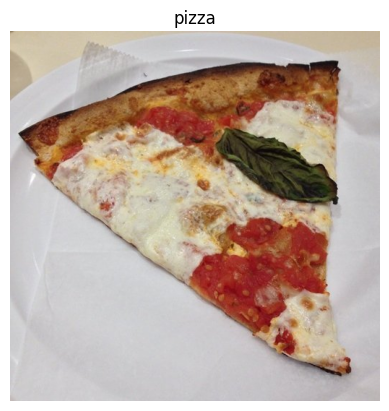

In [7]:
# View thw random image from the pizza directory
img = view_random_image(traget_dir = "/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/test/" , target_class = "pizza")

In [8]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[148, 131, 101],
        [146, 129,  99],
        [145, 128,  98],
        ...,
        [196, 181, 152],
        [196, 181, 152],
        [197, 182, 153]],

       [[157, 140, 110],
        [160, 143, 113],
        [165, 148, 118],
        ...,
        [195, 180, 151],
        [195, 180, 151],
        [197, 182, 153]],

       [[173, 156, 126],
        [179, 162, 132],
        [186, 169, 139],
        ...,
        [194, 179, 150],
        [194, 179, 150],
        [196, 181, 152]],

       ...,

       [[195, 187, 185],
        [195, 187, 185],
        [195, 186, 187],
        ...,
        [187, 181, 181],
        [188, 182, 182],
        [189, 183, 183]],

       [[196, 188, 186],
        [196, 188, 186],
        [195, 187, 185],
        ...,
        [187, 181, 181],
        [188, 182, 182],
        [189, 183, 183]],

       [[197, 189, 187],
        [196, 188, 186],
        [195, 187, 185],
        ...,
        [188, 182, 18

- A few more normal model , not CNNs for the comparision 


In [9]:
	
# Preprocessing the data
# The data is in the form of images , we need to convert them into tensors , so that we can use them in the model   
# Scaling the features  == > NORMALIZATION 
# convert the pixel values between 0 and 1
img / 255

array([[[0.58039216, 0.51372549, 0.39607843],
        [0.57254902, 0.50588235, 0.38823529],
        [0.56862745, 0.50196078, 0.38431373],
        ...,
        [0.76862745, 0.70980392, 0.59607843],
        [0.76862745, 0.70980392, 0.59607843],
        [0.77254902, 0.71372549, 0.6       ]],

       [[0.61568627, 0.54901961, 0.43137255],
        [0.62745098, 0.56078431, 0.44313725],
        [0.64705882, 0.58039216, 0.4627451 ],
        ...,
        [0.76470588, 0.70588235, 0.59215686],
        [0.76470588, 0.70588235, 0.59215686],
        [0.77254902, 0.71372549, 0.6       ]],

       [[0.67843137, 0.61176471, 0.49411765],
        [0.70196078, 0.63529412, 0.51764706],
        [0.72941176, 0.6627451 , 0.54509804],
        ...,
        [0.76078431, 0.70196078, 0.58823529],
        [0.76078431, 0.70196078, 0.58823529],
        [0.76862745, 0.70980392, 0.59607843]],

       ...,

       [[0.76470588, 0.73333333, 0.7254902 ],
        [0.76470588, 0.73333333, 0.7254902 ],
        [0.76470588, 0

# End to End Model :

-Building a Convolutional Neural network model , to find the Patterns in the images
1. Load the images
2. Preprocess the images
3. Build a CNN to find pattern in the images
4. Compile the CNN
5. Fit the CNN ti the data
The imageDataGenerator , will generate the batches of image data ,--> with real time data augmentation

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed

tf.random.set_seed(42)

# Preprocessing the data , get all the pixel values between 0 and 1 , Normalizing 
train_datagen = ImageDataGenerator(rescale = 1./255) 
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Set up path to data directories
train_dir = "/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/train/"
test_dir = "/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/test/"

# Import the data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory = train_dir , 
                                               batch_size = 32,
                                               target_size = (224 , 224),
                                                class_mode = "binary",
                                                 seed = 42 )


valid_data = valid_datagen.flow_from_directory(directory = test_dir ,
                                               batch_size = 32,
                                               target_size = (224 , 224),
                                               class_mode = "binary",
                                               seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [11]:
# Build a CNN model , (same as tiny VGG)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size= 3,
                           activation = "relu",
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10 , 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding= "valid"),
    tf.keras.layers.Conv2D(10 , 3 , activation = "relu"),
    tf.keras.layers.Conv2D(10 , 3 , activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1 , activation = "sigmoid")

])

/Users/akhilkumar/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In this the len(train_data) = 47 , that is 1500 classes divided by batch of 32 1500/32 = 47

In [12]:
# Compile the cnn

model_1.compile(loss = "binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model 

history_1 = model_1.fit(train_data, 
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5


/Users/akhilkumar/myenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 407ms/step - accuracy: 0.5961 - loss: 0.7114 - val_accuracy: 0.7880 - val_loss: 0.4593
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5


2025-01-25 23:58:59.971021: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/homebrew/Cellar/python@3.12/3.12.8/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2025-01-25 23:58:59.978906: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 394ms/step - accuracy: 0.7637 - loss: 0.4762 - val_accuracy: 0.8340 - val_loss: 0.4020
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 140us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5


2025-01-25 23:59:18.798010: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-01-25 23:59:18.800765: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 404ms/step - accuracy: 0.8146 - loss: 0.4216 - val_accuracy: 0.8580 - val_loss: 0.3507


In [13]:
model_1.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

Image shape : (512, 512, 3)
Image shape : (512, 512, 3)


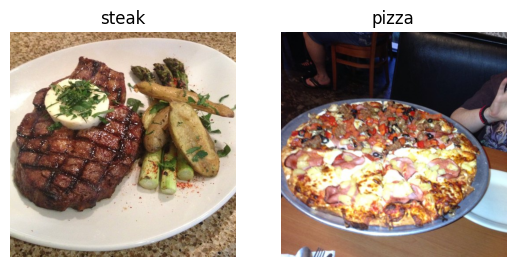

In [14]:
# Become one with the data
# Visualize the data 

plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/train/" , "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/train/" , "pizza")


## Pre process the data 


In [15]:
# Definr the data directory paths 

train_dir = "/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/train/"
test_dir = "/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/test/"


### Turn the data into "Batches"

- Reasons for using the batches :

- All the data say 100000 images might not fit into the **<mark style="background: #FF5582A6;">Memory</mark>** or a *GPU's* **<mark style="background: #BBFABBA6;">VRAM</mark>**

- Trying to learn the patterns in 100000 images , in one hit , might result in the model not being able to learn very well.

- batch_size = 32 : *More than this is not good for your health*

In [16]:
# create train and test data generators and rescale the data 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data   = train_datagen.flow_from_directory(directory = train_dir,
                                                           target_size = (224,224),
                                                           batch_size = 32,
                                                           class_mode = "binary",
                                                           seed = 42)
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                                         target_size = (224,224),
                                                         batch_size = 32,
                                                         class_mode = "binary",
                                                         seed = 42)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [31]:
# Get a sample of the training data batch 
images, labels = next(train_data) # get the 'next' batch of images/labels
len(images), len(labels)


(32, 32)

In [32]:
images[7].shape # resize to 224 x 224 x 3

(224, 224, 3)

In [33]:
# View the first batch of labels 

labels  # 0 is pizza , 1 is steak

array([0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
      dtype=float32)

1. In this in the very *first* layer we are defining <mark style="background: #FF5582A6;">16 filters , each 3x3 </mark>
2. But the imput of the image size is (224, 224 ,3)
3. And in the *end* there is only 1 neuron on the output layer , with a sigmoid function , for the binary classification , of the <mark style="background: #D2B3FFA6;">pizza</mark> or <mark style="background: #ABF7F7A6;">steak</mark>
4. 

# Baseline in CNN Models 
### A baseline is a relatively simple model or an existing result that is setted up for the beginning , and as the development and fine tuning of the model , it is beaten 

Like :

Con2D --> pooling --> output layer  : *This is a baseline model*
Con2D --> pooling --> Con2D --> pooling --> Con2D --> pooling --> output layer : *Developed Model*

In [35]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense , Activation
from tensorflow.keras.models import Sequential

## Baseline Model 

In [47]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, # size of the filter (3x3) movin across the image
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

/Users/akhilkumar/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [48]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


In [49]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

### Model Compilation :

- Model is needed to be compiled with a loss function and optimizer.
- In this case the loss function can be "binary cross entropy" , and the *optimizer* can be 
- <mark style="background: #D2B3FFA6;">Root mean square propagation (RMSprop)</mark>
- The RMSprop takes the learning rate (lr) parameter

**<mark style="background: #FFF3A3A6;">Filter parameter</mark>** : This decides how many filters should pass over an input tensor (*eg sliding windows over images*)


**Kernel Size aka Filter size** : This determines the shape of the filter (sliding windows) : 


1. <mark style="background: #FFB8EBA6;">3x3 : smaller window</mark> , for learning the small features in detail , like the toppings on the pizza

2. <mark style="background: #FFB8EBA6;">7x7 : Bigger size</mark> : for determine the edges of a pizza


In [50]:
history_4 = model_4.fit(train_data,
            epochs = 5 ,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))
                

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 490ms/step - accuracy: 0.5833 - loss: 0.9055 - val_accuracy: 0.7920 - val_loss: 0.4424
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5


2025-01-26 01:59:55.771621: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/homebrew/Cellar/python@3.12/3.12.8/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2025-01-26 01:59:55.778337: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 496ms/step - accuracy: 0.7899 - loss: 0.4565 - val_accuracy: 0.8100 - val_loss: 0.4286
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 141us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5


2025-01-26 02:00:19.364307: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-01-26 02:00:19.366628: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 518ms/step - accuracy: 0.8454 - loss: 0.3629 - val_accuracy: 0.8380 - val_loss: 0.3777


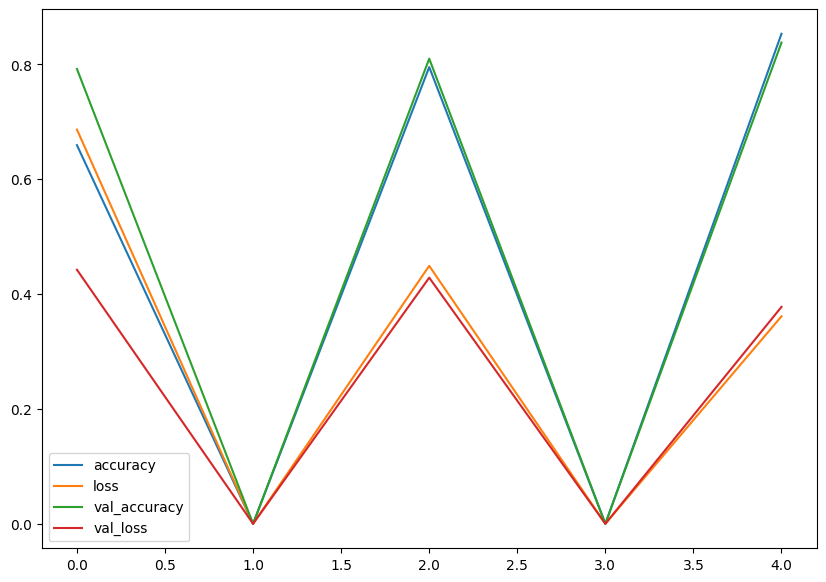

In [51]:

# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));


In [54]:
# plotting the curves separately 

def plot_loss_curves(history):
    """
    Returns separate loss curves for the training and validation metrics.
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history["loss"])) # how many epochs did we run for ?

    #Plot the loss

    plt.plot(epochs , loss , label = "trainig loss")
    plt.plot(epochs , val_loss , label = "val_loss")
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot the accuracy
    plt.figure()

    plt.plot(epochs , accuracy , label = "training accuracy")
    plt.plot(epochs , val_accuracy , label = "val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.legend()

    plt.show()



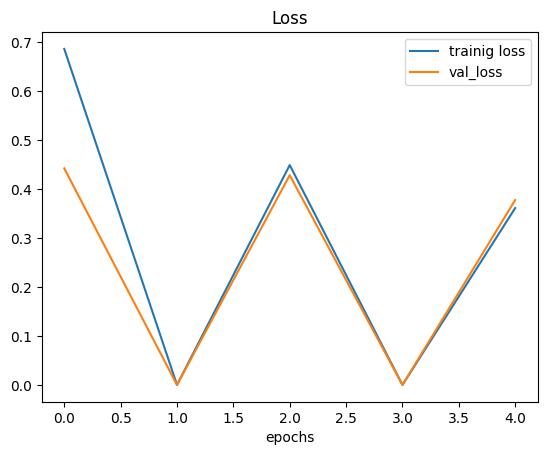

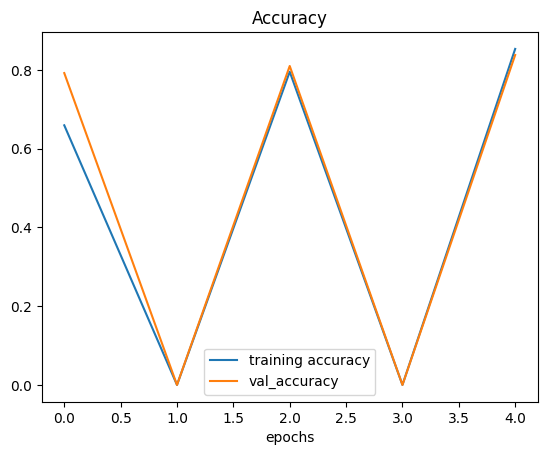

In [55]:
# Cheching the loss and accuracy curves of model_2

plot_loss_curves(history_4)

## Development Model 


In [ ]:
# constructing the CNN model 2

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16 , (3,3) , activation = "relu" , input_shape = (224 , 224 , 3)),
    tf.keras.layers.MaxPooling2D(2 ,2),
    tf.keras.layers.Conv2D(32 , (3,3) , activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64 , (3,3) , activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64 , (3,3) , activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64 , (3,3) , activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512 , activation = "relu"),
    tf.keras.layers.Dense(1 , activation = "sigmoid")

])

/Users/akhilkumar/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [57]:
# compile 

model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
model_2_history = model_2.fit(train_data,
                                 epochs = 5,
                                 steps_per_epoch = len(train_data),
                                 validation_data = test_data,
                                 validation_steps = len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 310ms/step - accuracy: 0.8218 - loss: 0.3967 - val_accuracy: 0.8720 - val_loss: 0.3139
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5


2025-01-26 02:07:41.453214: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/homebrew/Cellar/python@3.12/3.12.8/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2025-01-26 02:07:41.458560: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 288ms/step - accuracy: 0.8573 - loss: 0.3594 - val_accuracy: 0.8660 - val_loss: 0.3000
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 140us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5


2025-01-26 02:07:55.383167: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-01-26 02:07:55.385554: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 293ms/step - accuracy: 0.8810 - loss: 0.3400 - val_accuracy: 0.8780 - val_loss: 0.2908


- in the model.summary( ) we can see that how by time data has <mark style="background: #FFB8EBA6;">gone through all the convolution and pooling layer</mark>s , it ends up as <mark style="background: #FFF3A3A6;">5x5 items.</mark>
- In theory this will be activated <mark style="background: #BBFABBA6;">feature maps </mark>that are relatively simpe , containing just<mark style="background: #ADCCFFA6;"> **25** pixels</mark>

In [53]:
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,752,997 (10.50 MB)

 Trainable params: 917,665 (3.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,835,332 (7.00 MB)

## Overfitting :

#### Ways to induce Overfitting :

- Increase the number of Conv Layers
- Increase the number of Conv Filters
- Add another layer to the output of our flattened layers 

#### Ways to reduce Overfitting 

- Add Data Augmentation
- Add Regularization Layers 
- Add more Data

**Convolution Layers** : Finds features in an image
**Max Pooling** : Find the most important Features in that image 


## For some reason All models are performing just fine on this machine 

In [54]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

/Users/akhilkumar/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [55]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [56]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 496ms/step - accuracy: 0.6410 - loss: 0.6312 - val_accuracy: 0.8320 - val_loss: 0.4005
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5


2025-01-26 20:37:01.881959: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/homebrew/Cellar/python@3.12/3.12.8/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2025-01-26 20:37:01.890014: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 488ms/step - accuracy: 0.8154 - loss: 0.4142 - val_accuracy: 0.8740 - val_loss: 0.3290
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5


2025-01-26 20:37:25.364286: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-01-26 20:37:25.369877: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 452ms/step - accuracy: 0.8333 - loss: 0.4055 - val_accuracy: 0.8500 - val_loss: 0.3284


In [57]:
# Check out the model architecture
model_5.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

### Data Augmentation 🌴

so in this the training data is altered , to have more diversity in features allowing the model to learn more generalizable patterns , this might include , like size , shape , rotation , flipping , cropping, 

*<mark style="background: #21D99A;">Data Augmentation</mark> :* A technique of artificially increasing the training set by creating modified copies of a dataset using existing data

In [85]:
# Create  ImageDataGenetor training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale = 1/225. ,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2 ,
                                             width_shift_range = 0.2 ,
                                             height_shift_range = 0.3,
                                             horizontal_flip = True,
                                             fill_mode = "nearest")

In [59]:
# Create Image Data Generator , without data augmentation 

train_datagen = ImageDataGenerator(rescale = 1/225.)

# Create ImageDataGenerator without data aumentation for test data 

test_datagen = ImageDataGenerator(rescale = 1/225.)



In [64]:
# Visualizing augmented images 
# Import data and augment it from training directory
print("Augmented Training Data :")
train_data_augmented = train_datagen_augmented.flow_from_directory(directory = train_dir,
                                                                   target_size = (224,224),
                                                                   class_mode = "binary",
                                                                   shuffle = False)

#Create a non augmented training data batches 
print("Non augmented training data :")
train_data = train_datagen.flow_from_directory(directory = train_dir , 
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               shuffle = False)

# Non augmented tests data batches 
print("Non augmented test data:")
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                                target_size = (224,224),
                                                class_mode = "binary",
                                                shuffle = False)




Augmented Training Data :
Found 1500 images belonging to 2 classes.
Non augmented training data :
Found 1500 images belonging to 2 classes.
Non augmented test data:
Found 500 images belonging to 2 classes.


In [65]:
# Get some sample data batches 

images, labels = next(train_data)
augmented_images , augmented_labels = next(train_data_augmented)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Augmented Image')

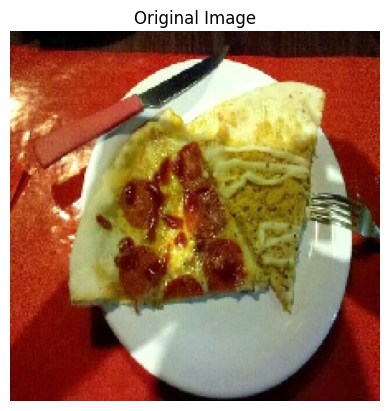

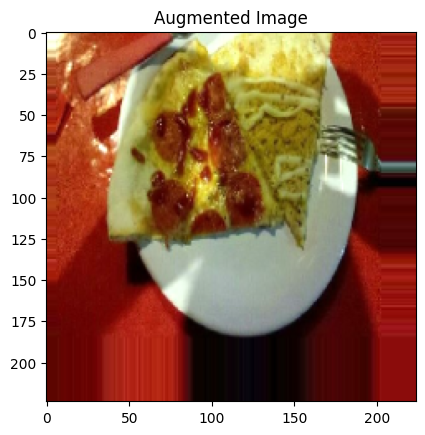

In [74]:
# Show the original image, and augmented image 

import random 

random_number = random.randint(0, 32)
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")


In [77]:
# Create a model that trains on augmented data 

model_6 = Sequential([
    Conv2D(10, 3 , activation = "relu" , input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3 , activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3 , activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1 , activation = "sigmoid")

])

/Users/akhilkumar/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [79]:
# Compile the model_6

model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [87]:
# Fit model_6

history_6 = model_6.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 234ms/step - accuracy: 0.6268 - loss: 0.7110 - val_accuracy: 0.5860 - val_loss: 0.6671
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5


2025-01-27 19:16:46.588087: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/homebrew/Cellar/python@3.12/3.12.8/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2025-01-27 19:16:46.594338: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 221ms/step - accuracy: 0.6048 - loss: 0.6703 - val_accuracy: 0.7660 - val_loss: 0.6119
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 166us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5


2025-01-27 19:16:58.471713: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-01-27 19:16:58.474285: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - accuracy: 0.6520 - loss: 0.6294 - val_accuracy: 0.7400 - val_loss: 0.6104


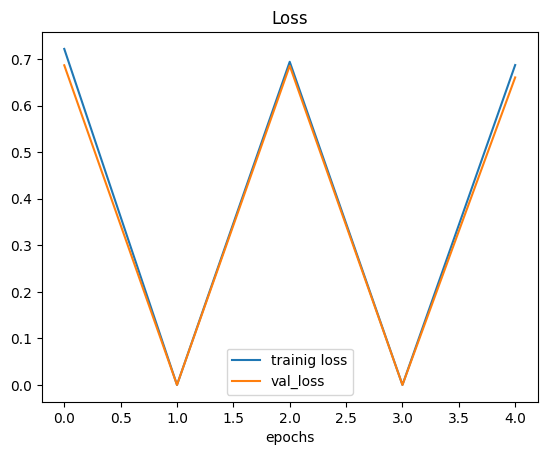

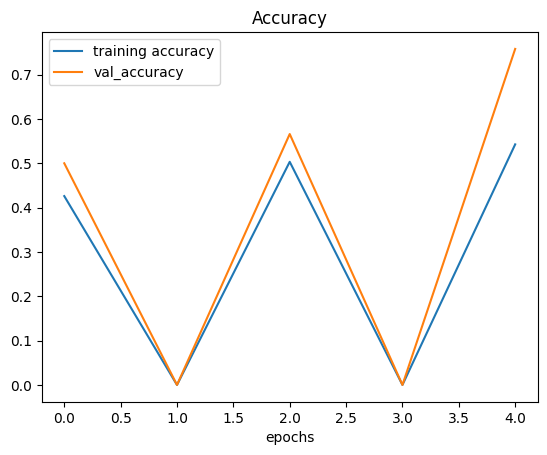

In [81]:
plot_loss_curves(history_6)

### Shuffle the training Augmented Data and train another model , same as before 

*<mark style="background: #BBFABBA6;">Shuffling the Data</mark>* : *Shuffling the data learns patterns from different classes at the smae time , 
If shuffle ="False" , then the model  learns all the patterns from the 1st class , and then moves , to the second class* 

In [89]:
# Reimport data and augment , and shuffle the data 
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [90]:
# Model_7 with shuffled augmented data 

model_7 = Sequential([
    Conv2D(10 , 3 , activation = "relu" , input_shape = (224 , 224 , 3)),
    MaxPool2D(),
    Conv2D(10 , 3 , activation = "relu"),
    MaxPool2D(),
    Conv2D(10 , 3 , activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1 , activation ="sigmoid")
])

/Users/akhilkumar/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [91]:
model_7.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])


In [92]:
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))


Epoch 1/5


/Users/akhilkumar/myenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 219ms/step - accuracy: 0.5978 - loss: 0.6632 - val_accuracy: 0.7860 - val_loss: 0.4901
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5


2025-01-27 19:21:47.891724: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/homebrew/Cellar/python@3.12/3.12.8/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2025-01-27 19:21:47.895163: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 211ms/step - accuracy: 0.7143 - loss: 0.5805 - val_accuracy: 0.8200 - val_loss: 0.4093
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 127us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5


2025-01-27 19:21:59.201024: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-01-27 19:21:59.203159: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 209ms/step - accuracy: 0.7178 - loss: 0.5511 - val_accuracy: 0.7840 - val_loss: 0.4775


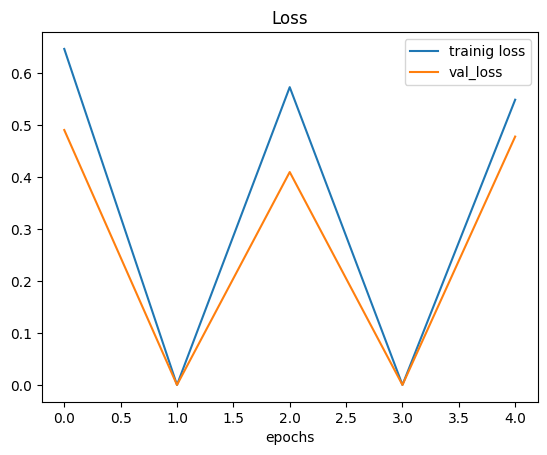

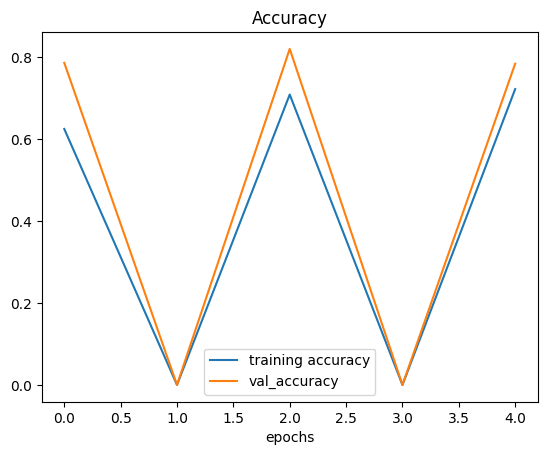

In [93]:
plot_loss_curves(history_7)

## Making a prediction with the trained model , with custom test data 


In [95]:
# Classes of the data
print(class_names)

['test' 'train']


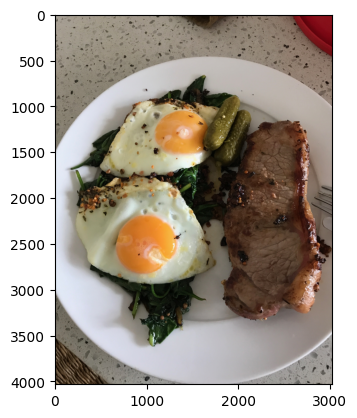

In [100]:
# View Example Image 
import matplotlib.image as imread
steak = mpimg.imread("/Users/akhilkumar/Desktop/Tesorflow - Expert/tensorflow-deep-learning/images/03-steak.jpeg")

plt.imshow(steak)

### The shape of the test image is too big !!

In [101]:
steak.shape

(4032, 3024, 3)

#### Have to change the shape of the Test Image !!!!

> When a NN is trained and , A prediction has to be made with custom , The custom data has to be preprocessed , into the same formatt , of the data , as the model was trained on 

### Creating a function to import and resize the image , to be able to use it with the model

In [113]:
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor, and reshapes it to (img_shape, img_shape, 3)
    """
    # Read the image file
    img = tf.io.read_file(filename)
    # Decode the image
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, [img_shape, img_shape])
    # Scale the image values to the range [0, 1]
    img = img / 255.0
    return img


In [116]:
steak = load_and_prep_image("/Users/akhilkumar/Desktop/Tesorflow - Expert/tensorflow-deep-learning/images/03-steak.jpeg")
steak.shape

TensorShape([224, 224, 3])

In [122]:
expanded_steak = tf.expand_dims(steak , axis = 0)
expanded_steak.shape

TensorShape([1, 224, 224, 3])

In [133]:
class_names

array(['pizza', 'steak'], dtype='<U5')

### The Prediction results are *Prediction Probability* , Need to decode it !! 🧣
##### Need ot write a Decipher function to give results 
##### We can index the predicted class by rounding the prediction probability and 

In [130]:
pred = model_7.predict(expanded_steak)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [131]:
#Round off the prediction probability 

pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

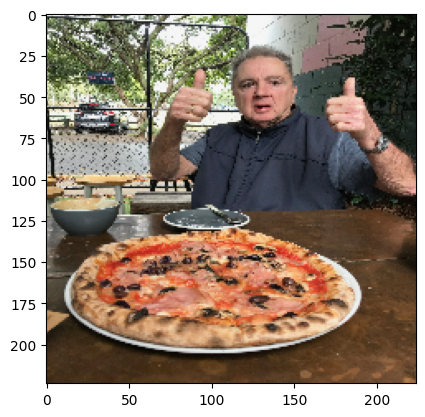

In [145]:
pizza = mpimg.imread('/Users/akhilkumar/Desktop/Tesorflow - Expert/tensorflow-deep-learning/images/03-pizza-dad.jpeg')

pizza = load_and_prep_image('/Users/akhilkumar/Desktop/Tesorflow - Expert/tensorflow-deep-learning/images/03-pizza-dad.jpeg')
plt.imshow(pizza)
pizza.shape
pizza_expanded = tf.expand_dims(pizza , axis = 0)

In [146]:
pred_2 = model_7.predict(pizza_expanded)
pred_class_2 = class_names[int(tf.round(pred_2))]
pred_class_2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


'steak'

In [148]:
## Making the function

def pred_and_plot(model , filename , class_names) :
    img = load_and_prep_image(filename)
    img_expanded = tf.expand_dims(img , axis = 0)
    pred = model.predict(img_expanded)
    pred_class = class_names[int(tf.round(pred))]
    plt.imshow(img)
    plt.title(f"Prediction : {pred_class}")
    plt.axis(False)
    plt.show()
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


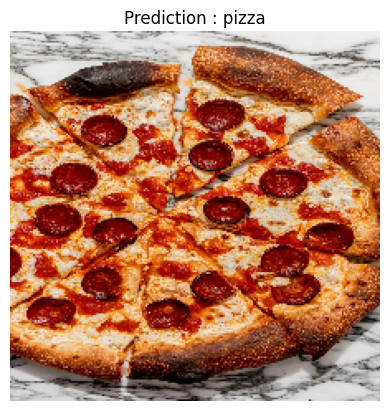

In [157]:
pred_and_plot(model_6 , "/Users/akhilkumar/Downloads/new-york-style-pizza2.jpg" , class_names)